In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
!pip install category_encoders
import category_encoders as ce

  Using cached category_encoders-2.8.1-py3-none-any.whl.metadata (7.9 kB)
Using cached category_encoders-2.8.1-py3-none-any.whl (85 kB)


In [4]:
df = pd.read_csv('data_no_missing.csv')

top_cities = df['City'].value_counts().nlargest(15).index
city_depression_mean = df[df['City'].isin(top_cities)].groupby('City')['Depression'].mean().sort_values(ascending=False)

In [5]:
top_cities = df['City'].value_counts().nlargest(15).index
city_depression_mean = df[df['City'].isin(top_cities)].groupby('City')['Depression'].mean().sort_values(ascending=False)

/tmp/ipython-input-1492996086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_depression_mean.index, y=city_depression_mean.values, palette="viridis")


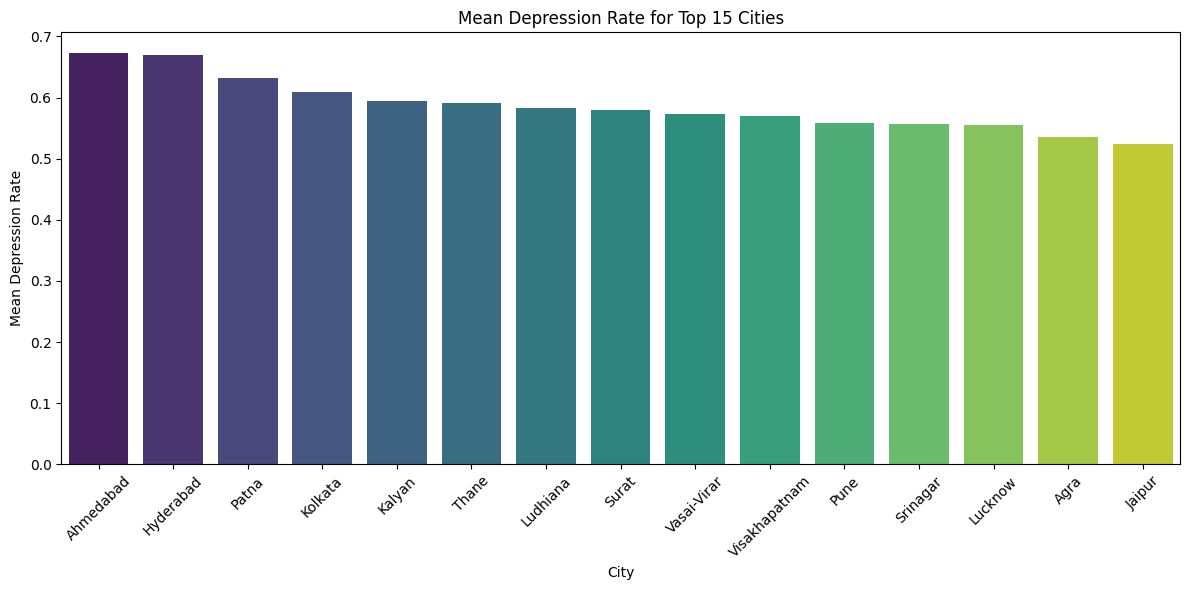

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x=city_depression_mean.index, y=city_depression_mean.values, palette="viridis")
plt.title('Mean Depression Rate for Top 15 Cities')
plt.xlabel('City')
plt.ylabel('Mean Depression Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
sleep_order = ['Others', 'Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
sleep_depression_mean = df.groupby('Sleep Duration')['Depression'].mean().reindex(sleep_order)

/tmp/ipython-input-3716979703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleep_depression_mean.index, y=sleep_depression_mean.values, palette="plasma")


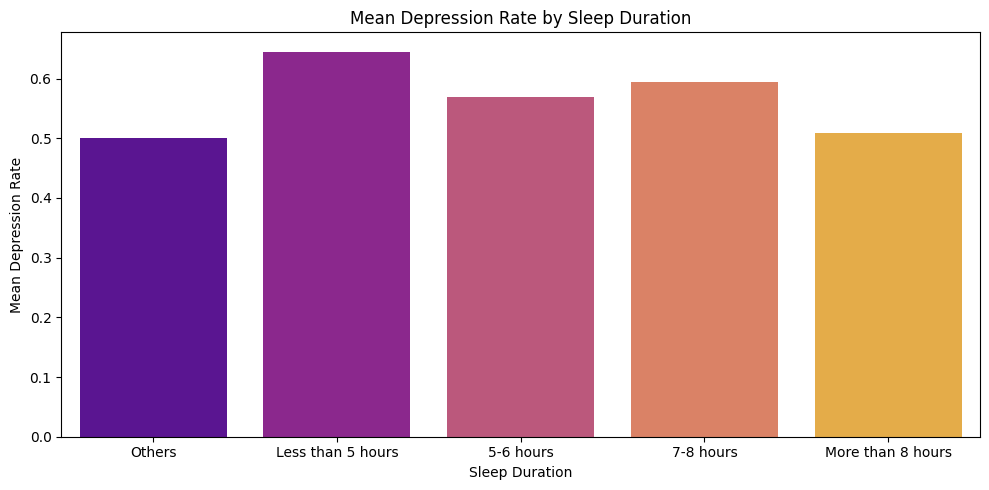

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(x=sleep_depression_mean.index, y=sleep_depression_mean.values, palette="plasma")
plt.title('Mean Depression Rate by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Mean Depression Rate')
plt.tight_layout()
plt.show()

In [9]:
# 2. Binary Encoding (manual mapping)
# ========================
# Gender: Male=1, Female=0
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

# Suicidal thoughts: Yes=1, No=0
df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].map({"Yes": 1, "No": 0})

# Family history: Yes=1, No=0
df["Family History of Mental Illness"] = df["Family History of Mental Illness"].map({"Yes": 1, "No": 0})

In [10]:
# Sleep Duration (example: "5-6 hours"=1, else=0 → adjust if needed)
df["Sleep Duration"] = df["Sleep Duration"].map({
    "Less than 5 hours": 0,
    "5-6 hours": 1,
    "7-8 hours": 2,
    "More than 8 hours": 3
})

# Dietary Habits: Healthy=1, else=0
df["Dietary Habits"] = df["Dietary Habits"].map({
    "Healthy": 0,
    "Moderate": 1,
    "Unhealthy": 3
})

In [11]:
X = df.drop('Depression', axis=1)
y = df['Depression']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 22320, Testing samples: 5581


In [13]:
high_card_cols = ['City', 'Profession', 'Degree']

In [14]:
target_encoder = ce.TargetEncoder(cols=high_card_cols)
target_encoder.fit(X_train, y_train)

X_train_encoded = target_encoder.transform(X_train)
X_test_encoded = target_encoder.transform(X_test)

In [15]:
display(X_train_encoded.head())

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
13048,66085,1,28.0,0.530909,0.586499,2.0,0.0,8.29,5.0,0.0,1.0,1.0,0.548458,0,4.0,1.0,1
24535,123583,0,33.0,0.620647,0.586499,4.0,0.0,9.05,4.0,0.0,0.0,0.0,0.538333,0,12.0,4.0,1
15303,77220,0,33.0,0.519802,0.586499,4.0,0.0,8.08,4.0,0.0,0.0,0.0,0.523702,1,12.0,3.0,0
22444,113182,0,29.0,0.546351,0.586499,2.0,0.0,5.76,4.0,0.0,1.0,1.0,0.501515,0,10.0,2.0,1
18744,94866,0,20.0,0.593861,0.586499,5.0,0.0,5.77,5.0,0.0,2.0,1.0,0.711325,1,11.0,5.0,0


In [16]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22320 entries, 13048 to 23654
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     22320 non-null  int64  
 1   Gender                                 22320 non-null  int64  
 2   Age                                    22320 non-null  float64
 3   City                                   22320 non-null  float64
 4   Profession                             22320 non-null  float64
 5   Academic Pressure                      22320 non-null  float64
 6   Work Pressure                          22320 non-null  float64
 7   CGPA                                   22320 non-null  float64
 8   Study Satisfaction                     22320 non-null  float64
 9   Job Satisfaction                       22320 non-null  float64
 10  Sleep Duration                         22303 non-null  float64
 11  Die

In [17]:
X_train_encoded.to_csv('X_train_encoded.csv', index=False)
X_test_encoded.to_csv('X_test_encoded.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)